# Math 502

## Lecture 4 - January 22.

### M. Lamoureux

###  Wrapping up the traffic model.

Looking back at lectures 2 and 3, we have a nice traffic flow model which we have put into code. With the benefit of hindsight, we can clean up the code and make something that is nice.

Recall we have two functions, flux $q(x,t)$ which measures the number of cars per second that pass a spot, and density $\rho(x,t)$ which measures number of cars per meter at any point on the road. They are related by the equation
$$ q(x,t) = v\cdot \rho(x,t),$$
where $v$ is the velocity of the cars. Checking units, we see $v$ is measures in meters per second. 

The differential equation we need to solve is
$$\frac{\partial \rho}{\partial t} + \frac{\partial q}{\partial x} = 0.$$
(Again, you might want to check units, to see that this equation makes physical sense. )

When $v=v(x)$ depends only on position, we have a solution given by defining the antiderivative of slowness
$$S(x) = \int_0^x \frac{1}{v(x')} \, dx',$$
and then set
$$ q(x,t) = f(S(x) - t), \qquad \rho(x,t) = \frac{1}{v(x)} f(S(x) - t).$$
Here, $f$ is an arbitrary bump function representing the inital density of cars. 

### Nice code

We can set up our code for the simple case where the velocity $v(x)$ takes one value to the left of the origin, and another value to the right of the origin. Then $S(X)$ should take values
$$S(x) = \frac{x}{v_{left}} \mbox{ for } x<0; S(x) = \frac{x}{v_{right}} \mbox{ for } x>0.$$
The rest of the code is as in Lecture 3.

In [1]:
## Import some key functions
from numpy import *
from matplotlib.pyplot import *
from ipywidgets import interact

In [26]:
## define our key constants

# velocities
v_left = 30  #(meters/sec)
v_right = 15 #(meters/sec)

# width of the bump of cars
width = 100 # (meters)

# range of x values we explore
x_range = 500. #(meters)

t_min = -x_range/v_left #(seconds)
t_max = x_range/v_right #(seconds)



## Key functions

# we use absolute value function, so Python knows how to handle a vector input. 
def v(x):
    return (v_right + v_left)/2 + (v_right - v_left)*sign(x)/2 

def S(x):
    return (1/v_right + 1/v_left)*x/2 + (1/v_right - 1/v_left)*abs(x)/2 

# check units! We observe the bump function expects a time variable! So scale the width appropriately

def bump(t):
    return exp((-t**2)/((width/(2*v_left))**2))

def update(t=0):
    plot(x,bump(S(x)-t)/v(x))
    
x = linspace(-x_range,x_range,100)
interact(update,t=(t_min,t_max,.1));

interactive(children=(FloatSlider(value=0.0, description='t', max=33.333333333333336, min=-16.666666666666668)…

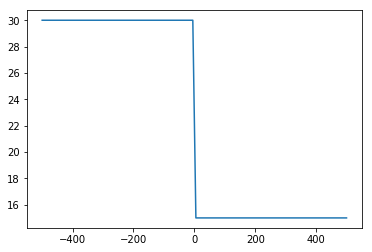

In [23]:
## Sanity check
plot(x,v(x))

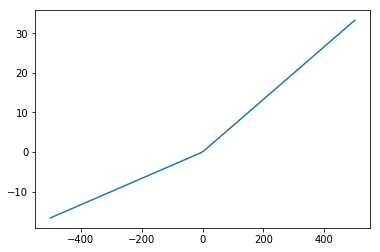

In [24]:
## sanity check
plot(x,S(x))

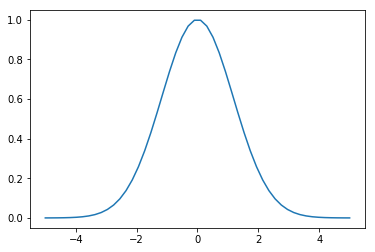

In [25]:
## sanity check
t = linspace(-5,5)
plot(t,bump(t))

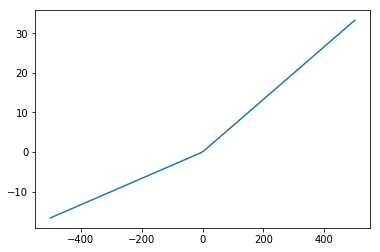

In [27]:
plot(x,S(x))

## Exercise 1

Replace the jump function for $v(x)$ with a smooth, monotonic function that has a left limit of $v_left$ and a right limit of $v_right$. Choose a function where it is easy to compute the antiderivative of slowness $1/v(x)$. 

Hint: Rational functions won't work. (Exercise 1a. Why not?) You might want to consider functions like arctan $\tan^{-1}(x)$ or hyperbolic tan $\tanh(x)$. 

## Exercise 2

Adjust the code above to use your new definition of $v(x)$ and the resulting $S(x).$

## The traffic jam situation.

Suppose, instead, that the velocity depends on the density $\rho$. This is a hypothesized law, suggesting that car drivers will tend to go faster if there is a lot of space on the road, and will slow down if the density increases. (Think about how you drive in congested traffic -- if there are lots of cars, you have to slow down to give you enough stopping distance to feel safe.)

A simple model for a situation like this would be a formula like
$$ v = 1-\rho, \mbox{ where we assume density is between 0 and 1.}$$
In this case, the flux is $q = \rho(1-\rho)$ and so the local wave speed is 
$$\frac{dq}{d\rho} = 1 - 2\rho,$$
which is positive or negative depending on whether the density is below or above $1/2$. 

The differential equation becomes
$$\rho_t + (1-2\rho)\rho_x = 0,$$
which is non-linear, but simple enough that we can solve it numerically. (Maybe even analytically). What we do observe is that if at some point $x$ on the road, if $\rho > 1/2, \mbox{and} \rho_x >0$, then the density will be increasing with time. While if $\rho < 1/2, \mbox{and} \rho_x >0$, the density will be decreasing with time. This will tend to form a "shock wave" in the density of cars. That is, if there is a point on the road where the density passes from below 1/2 to above 1/2, the density before that point decreases, while the density after that point increases. This continues until you get the sharp shock wave. You car sees this as a transition into a very dense, slow moving region of cars, following by the clearing out of the road as you move into the rarified region after the shock. 

It's kind of a pain to insert a diagram in Jupyter. Maybe you (the student) can come up will a better way to plug in an image. But here is one from Fowler's book. 

![Image from Fowler text](images/Fowler_fig1_1_cropped.jpg)

## Numerical experiments
We might as well see if we can solve this numerically. It's a first order PDE, in only 2 variables, so it seems like it should be easy.

Take the equation:
$$ \rho_t = (2\rho-1)\rho_x$$
and solve it by time-stepping. The discrete time derivative
$$\frac{\rho(x,t + \Delta t) - \rho(x,t)}{\Delta t} = (2\rho-1)\rho_x(x,t)$$
unravels into the time step formula:
$$\rho(x,t + \Delta t) = \rho(x,t) + (\Delta t) (2\rho-1)\rho_x(x,t).$$

I did this originally in Julia. So we can either switch kernels in this notebook, or re-write it in Python. Let's see how it goes in class.

Here is how we do it in Julia. 

so we will need to load in PyPlot for our plots. The rest is easy.

In [1]:
using PyPlot

4

In [2]:
# Let's set up some initial parameters to define the problem
x0 = 0
x1 = 10
t0 = 0
t1 = 10
Nx = 100
Nt = 1000
dx = (x1-x0)/Nx
dt = (t1-t0)/Nt
x = linspace(x0,x1,Nx)
t = linspace(t0,t1,Nt)

3.375

In [ ]:
# We now set up the solution matrix
# and include some initial values for rho (as a Gaussian).
# Then we solve via time stepping

p = zeros(Nx,Nt)
px = zeros(Nx,1)  # this will be the x derivative, computed by central differences
p[:,1] = p0 = .7*exp(-(x-5).^2/1^2) # The initial density at time zero
for k in 1:(Nt-1)
    px[2:(Nx-1)] = (p[3:Nx,k]-p[1:(Nx-2),k])/(2*dx)
    p[:,k+1] = p[:,k] + dt*(2*p[:,k]-1).*px
end

In [3]:
# We plot a few curves as time advances. Time t=0 is amplified, so we see where we start.
plot(x,1.1*p[:,1],x,p[:,25],x,p[:,50],x,p[:,75],x,p[:,100])

Do some experients with this code
- adjust the size of the Gaussian (height, width)
- heights that go over 1/2 seem to be important, according to Fowler. Verify. 
- for small heights, we should see a wave propagating. Verify. Check the speed. Verify the direction.
- Note that Michael found an error in his code using these simple tests. Tests are important!
- is the code stable? What happens for large values of the time index?